# California Housing Price Predictor 
## Version 2.0 : Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error


## The data set

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## About this file

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

## Exploratory Data Analysis (EDA)

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='median_house_value', ylabel='Count'>

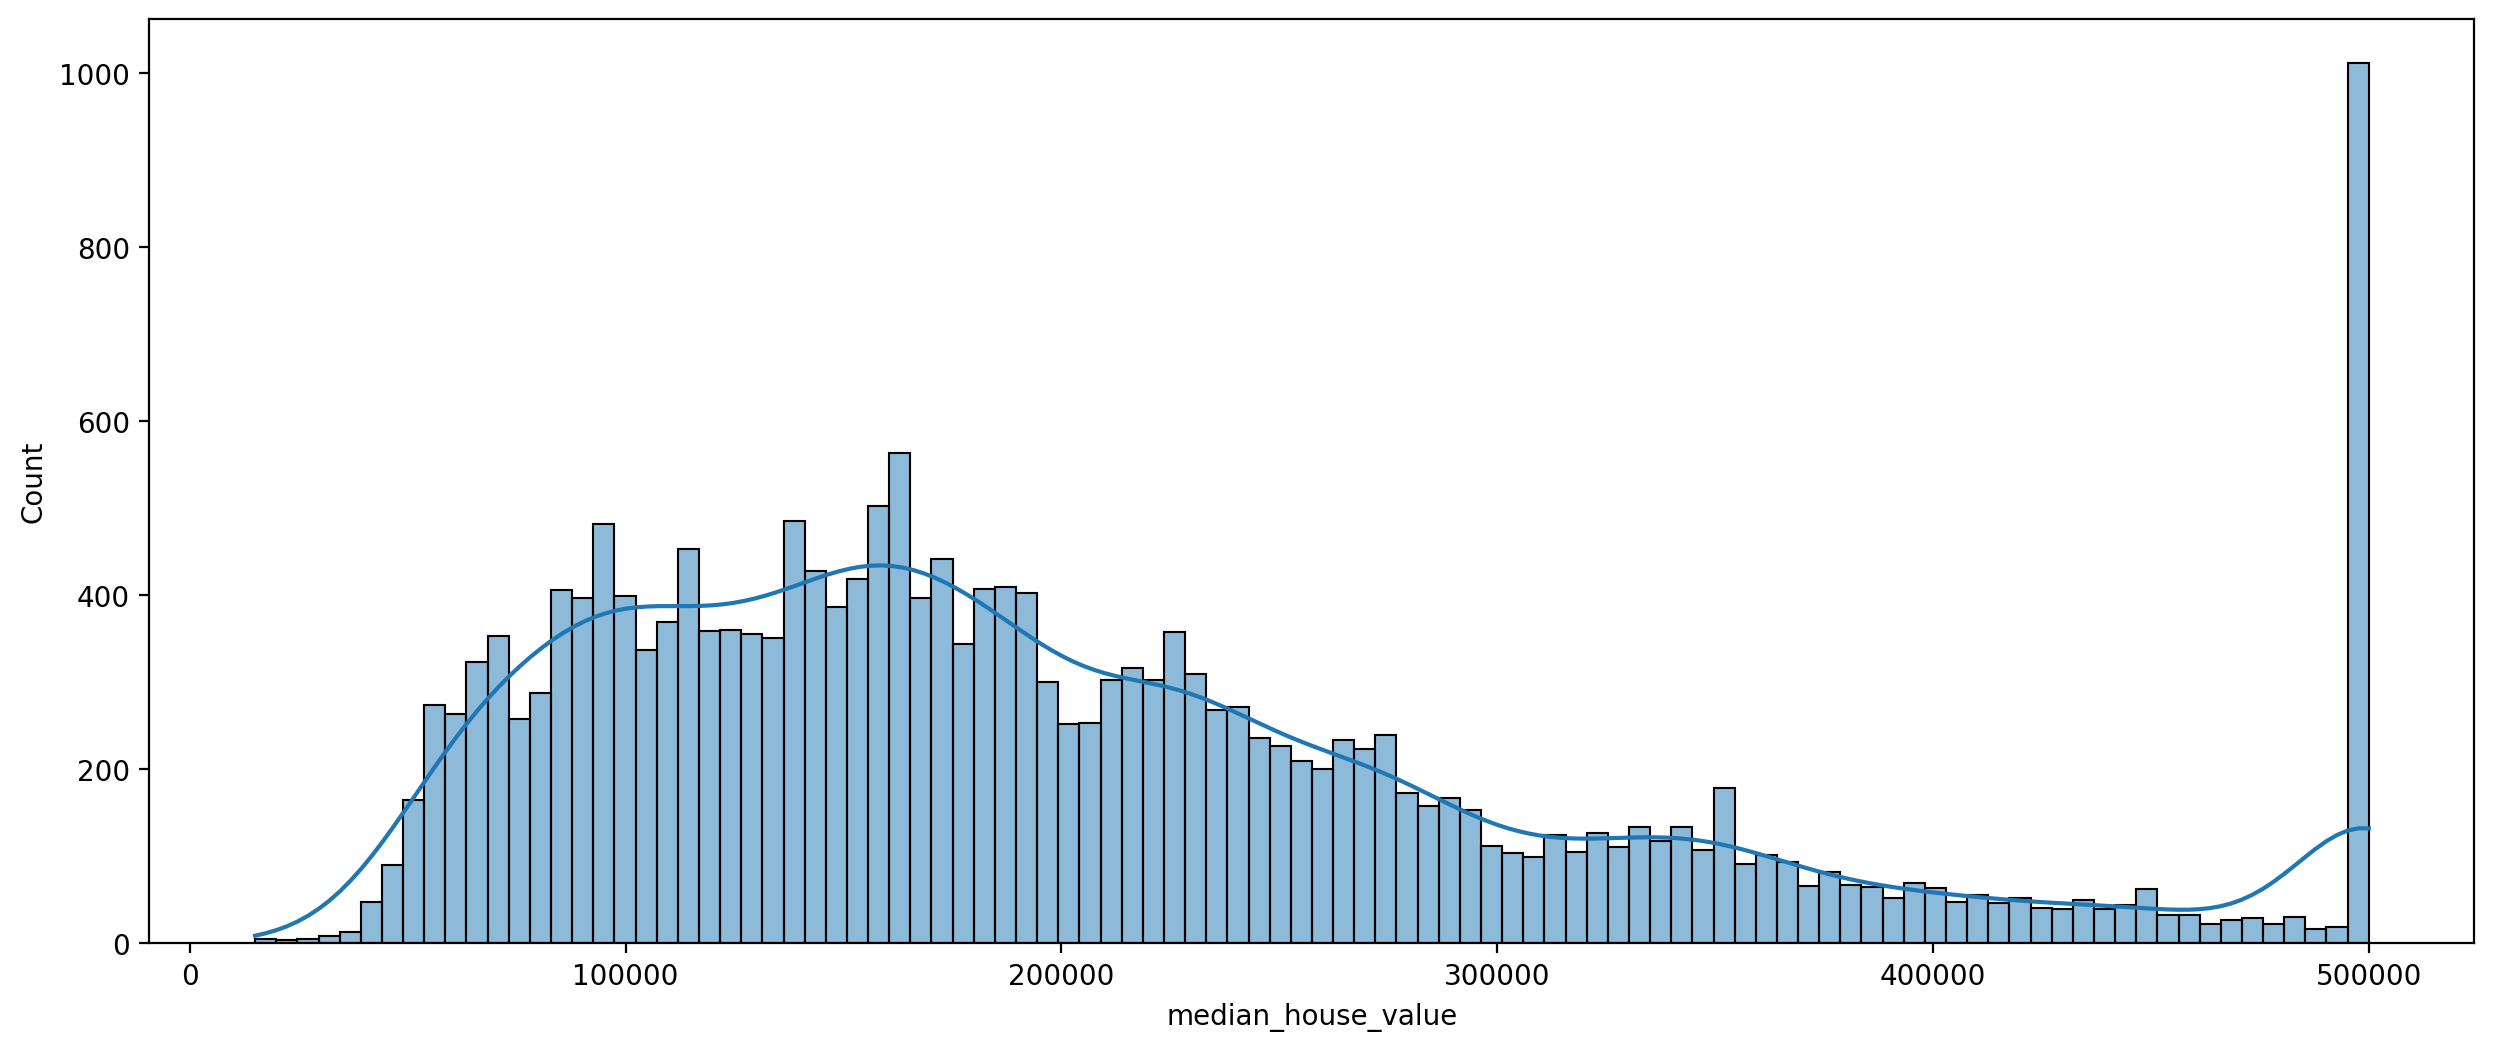

In [8]:
plt.figure(figsize=(15, 6), dpi=200)
sns.histplot(data=df, x='median_house_value', bins=100, kde=True)

## Preprocessing
### Define features and label:

In [9]:
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
X = X.fillna(X.median())
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [10]:
y = df['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

## Model Building

###  Choosing the Optimal Degree for Polynomial Regression

To avoid both **underfitting** and **overfitting**, we evaluate polynomial regression models of increasing degree (from 1 to 9) and measure their performance on both the training and test sets.

For each degree `d`, the following steps are performed:

1. **Feature Transformation**  
   The original feature(s) are transformed into a new feature set that includes polynomial terms up to degree `d` using `PolynomialFeatures`.  
   For example, if the input feature is `x` and `d = 3`, the transformed features become:  
   \[
   [x, x^2, x^3]
   \]

2. **Train-Test Split**  
   The polynomial feature set is split into training and testing sets (70% training, 30% testing).

3. **Model Training**  
   A linear regression model is fitted on the training set using the transformed polynomial features.

4. **Prediction and Evaluation**  
   The trained model makes predictions on both training and testing sets.  
   We then compute the **Root Mean Squared Error (RMSE)** for both sets to evaluate how well the model fits.

5. **Error Tracking**  
   RMSE values for both training and test sets are stored for each degree, allowing us to later plot and analyze how model performance changes with increasing complexity.

This process helps identify the **optimal polynomial degree** — one that minimizes the test error without significantly overfitting the training data.


In [11]:
train_rmse_error = []
test_rmse_error = []

In [12]:
for d in range(1,7):
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_error.append(train_RMSE)
    test_rmse_error.append(test_RMSE)

    

In [13]:
train_rmse_error

[np.float64(69750.66570598472),
 np.float64(63441.98578494875),
 np.float64(59345.57697905797),
 np.float64(58599.12458536393),
 np.float64(72519.8211347204),
 np.float64(92461.51712798077)]

In [14]:
test_rmse_error

[np.float64(69692.01357338406),
 np.float64(66298.03651749791),
 np.float64(115659.14260508897),
 np.float64(2692545.5572287133),
 np.float64(15239933.18936563),
 np.float64(79478881.43445086)]

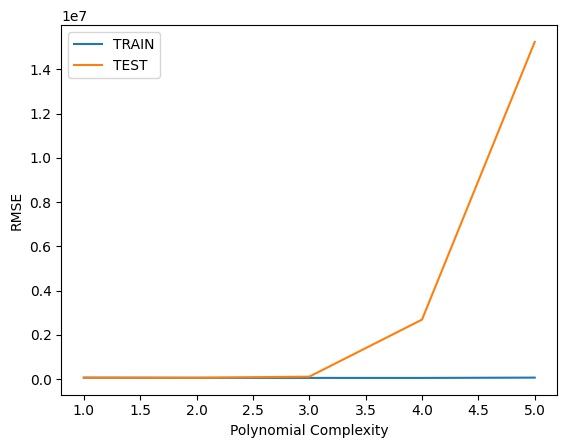

In [20]:
plt.plot(range(1,6),train_rmse_error[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_error[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

After evaluating polynomial regression models with degrees ranging from 1 to 5, **degree = 2** was selected as the optimal polynomial degree. This choice was based on the Root Mean Squared Error (RMSE) values calculated on both the training and test datasets. While increasing the degree generally reduces training error, the test error initially decreases and then starts to rise — indicating overfitting beyond a certain point. At degree 2, the test RMSE is at its lowest, suggesting that the model captures the underlying non-linear patterns in the data without overfitting. Higher degrees result in a sharp increase in test error, confirming that the model becomes too complex and fails to generalize well. Hence, degree = 2 provides the best balance between model complexity and predictive performance.


### Fit Polynomial Regression:

In [52]:
final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [53]:
polynomial_features = final_poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, random_state=42)

In [ ]:
selected_model = LinearRegression()

In [55]:
selected_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predictions:

In [ ]:
test_prediction = selected_model.predict(X_test)

In [57]:
test_prediction

array([ 78552.55476332,  99891.51322677, 252819.84106487, ...,
       236287.5250562 , 125045.98376632, 197273.19820464], shape=(6192,))

## Model Evaluation

In [58]:
print(f"the MAE is {mean_absolute_error(y_test, test_prediction)}")

the MAE is 46575.62213552799


In [59]:
print(f"the MSE is {mean_squared_error(y_test, test_prediction)}")

the MSE is 4395429646.075486


In [60]:
print(f"the RMSE is {root_mean_squared_error(y_test, test_prediction)}")

the RMSE is 66298.03651749791


### Actual vs Predicted plot:

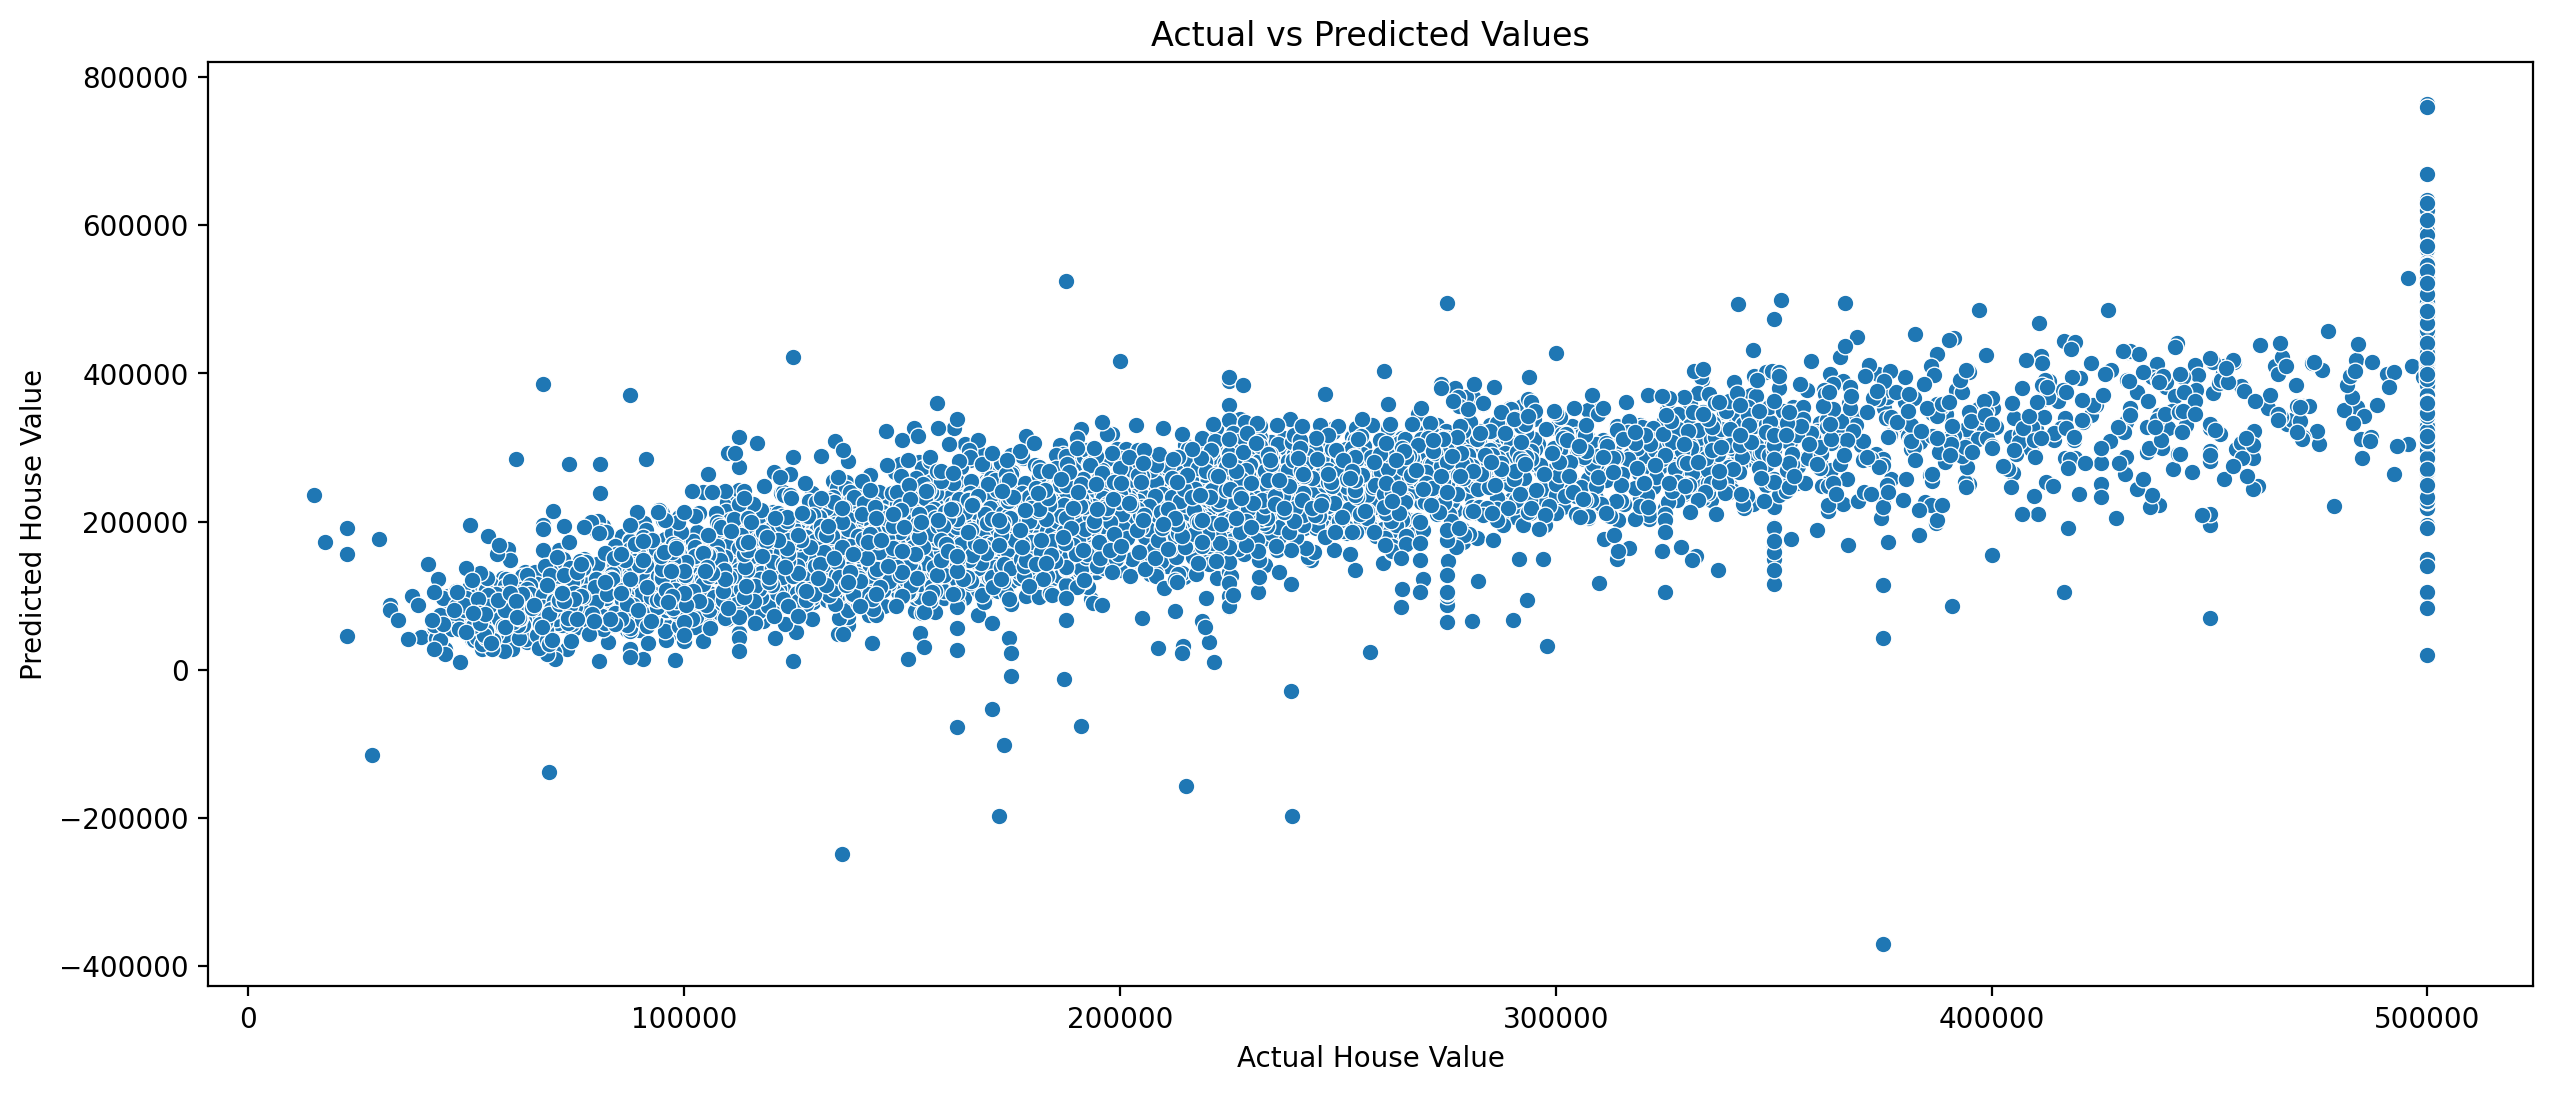

In [61]:
plt.figure(figsize=(15, 6), dpi=200)
sns.scatterplot(x=y_test, y=test_prediction)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted Values")
plt.show()


### Residual Plot

In [62]:
test_residuals = y_test - test_prediction

In [63]:
test_residuals

20046    -30852.554763
3024     -54091.513227
15663    247181.158935
20484    -35816.490387
9814      -1833.110239
             ...      
17505     19630.062497
13512      9748.246968
10842    -17887.525056
16559     -5645.983766
5786      12526.801795
Name: median_house_value, Length: 6192, dtype: float64

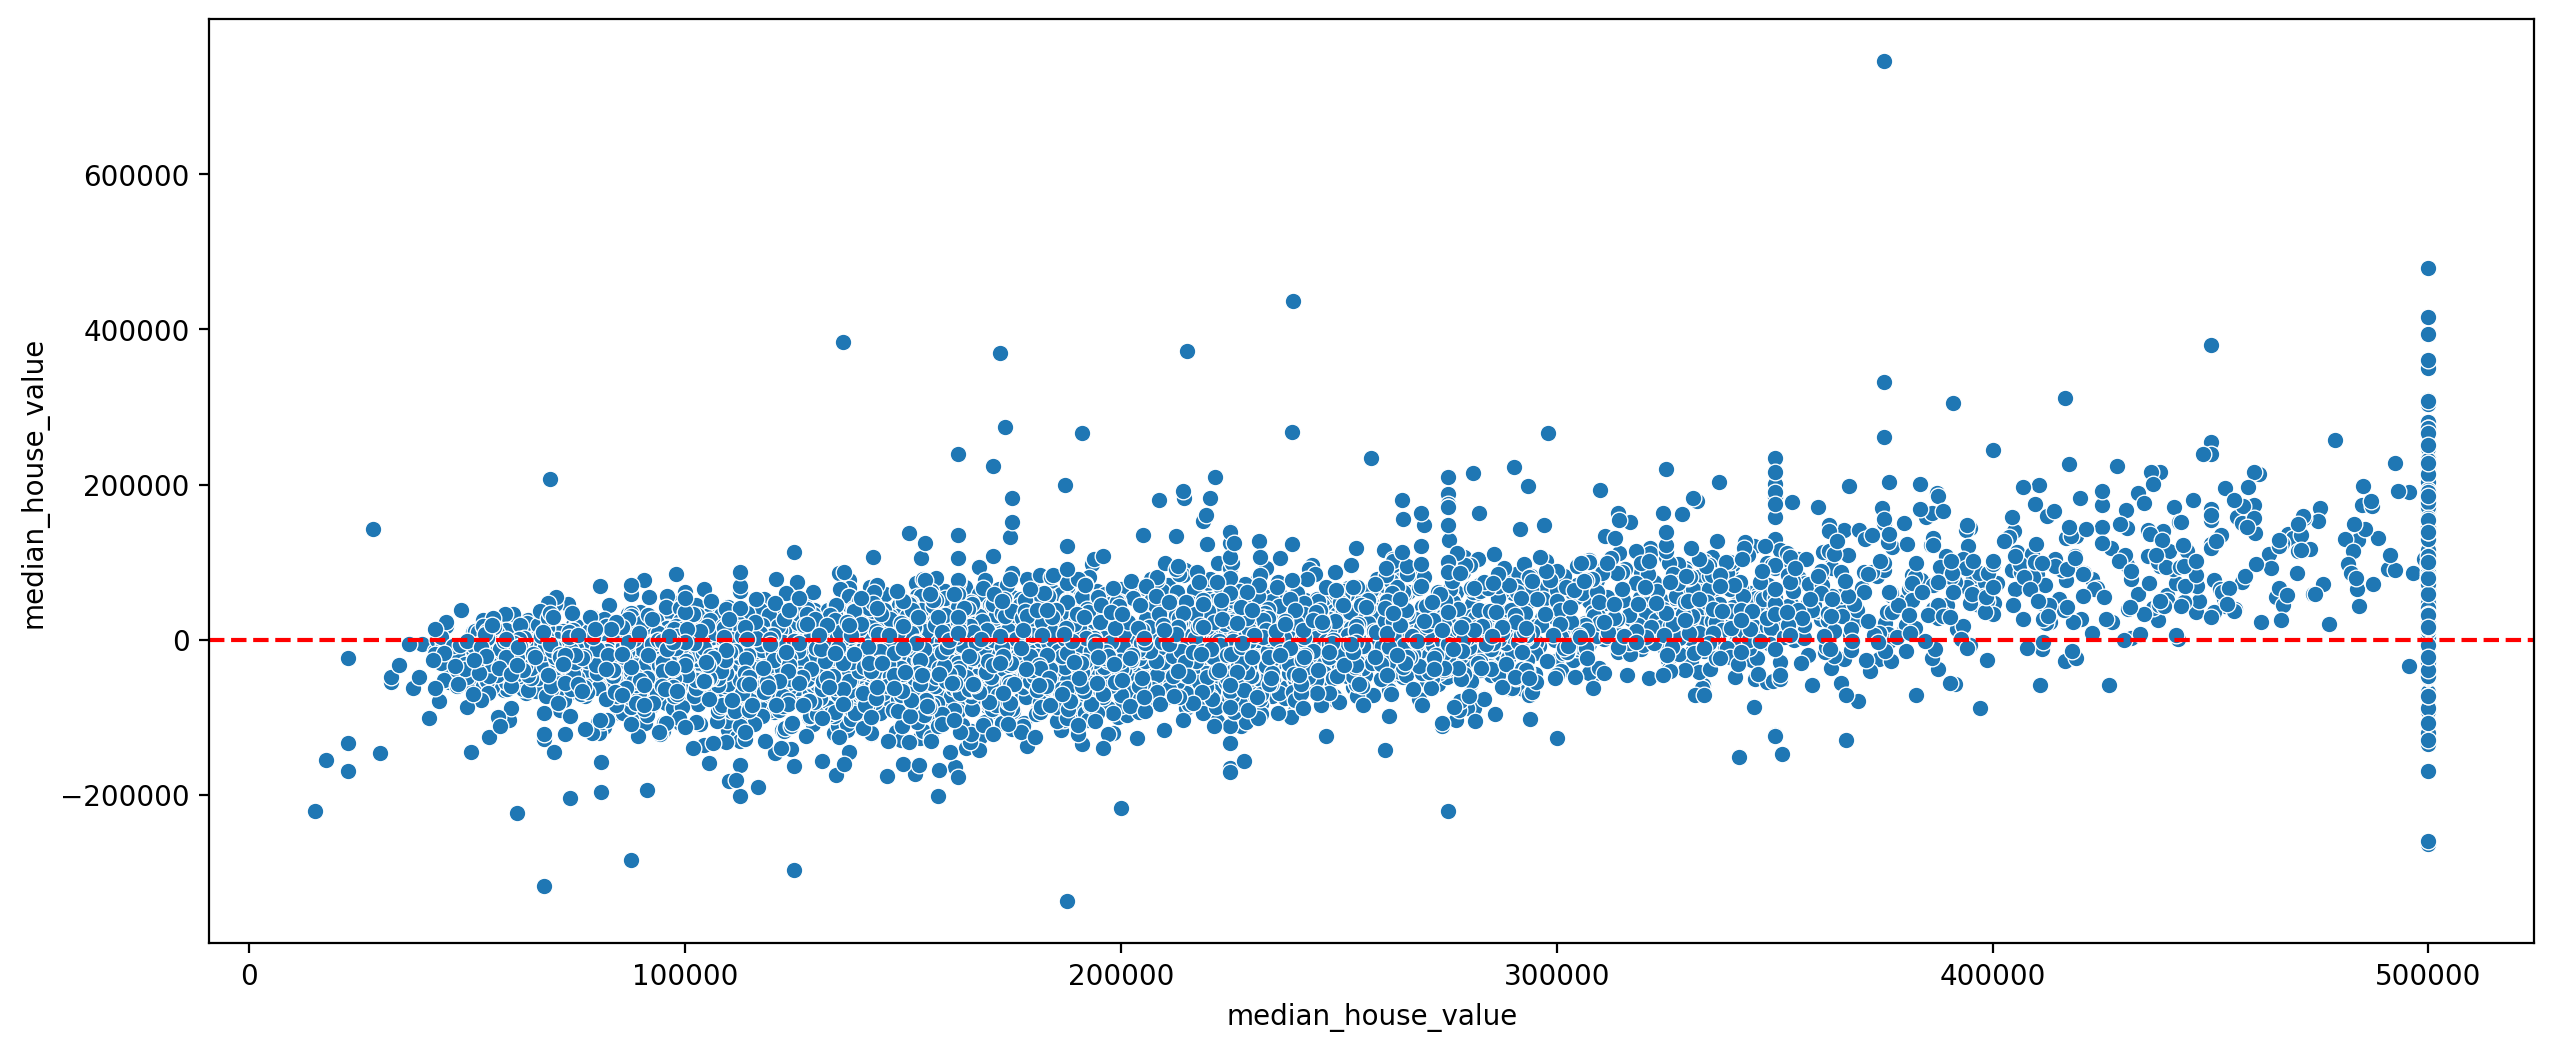

In [64]:
plt.figure(figsize=(15, 6), dpi=200)
sns.scatterplot(x=y_test, y= test_residuals)
plt.axhline(y=0, color='red', ls='--')

## Deployment

In [65]:
final_model = LinearRegression()

In [66]:
final_model.fit(polynomial_features,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
final_model.coef_

array([ 6.99181490e+05,  9.85967574e+05, -7.90490228e+04,  9.80450632e+02,
       -3.76975489e+03,  6.65847317e+02, -3.39214172e+03, -9.38210212e+05,
        4.68014385e+03,  1.22581824e+04, -9.54097955e+02,  1.25319964e+01,
       -4.97931740e+01,  9.61853151e+00, -4.42937750e+01, -1.20385583e+04,
        6.99427429e+03, -1.01746683e+03,  1.31195551e+01, -5.46425737e+01,
        1.38340959e+01, -5.47236872e+01, -1.25175729e+04,  2.23505342e+01,
       -1.27483374e-01,  7.03652524e-01, -1.42317888e+00,  5.11373298e+00,
        1.04318598e+02, -1.31275255e-03,  5.34472682e-03, -5.97875729e-03,
        3.21980349e-02,  8.59656633e+00, -5.60814873e-03,  3.21243198e-02,
       -1.65191484e-01, -2.45385561e+01,  3.02903587e-03, -2.14359166e-02,
       -5.73810192e+00,  4.70521579e-02,  9.11235168e-01, -2.24687096e+03])

In [68]:
y_hat = final_model.predict(polynomial_features)

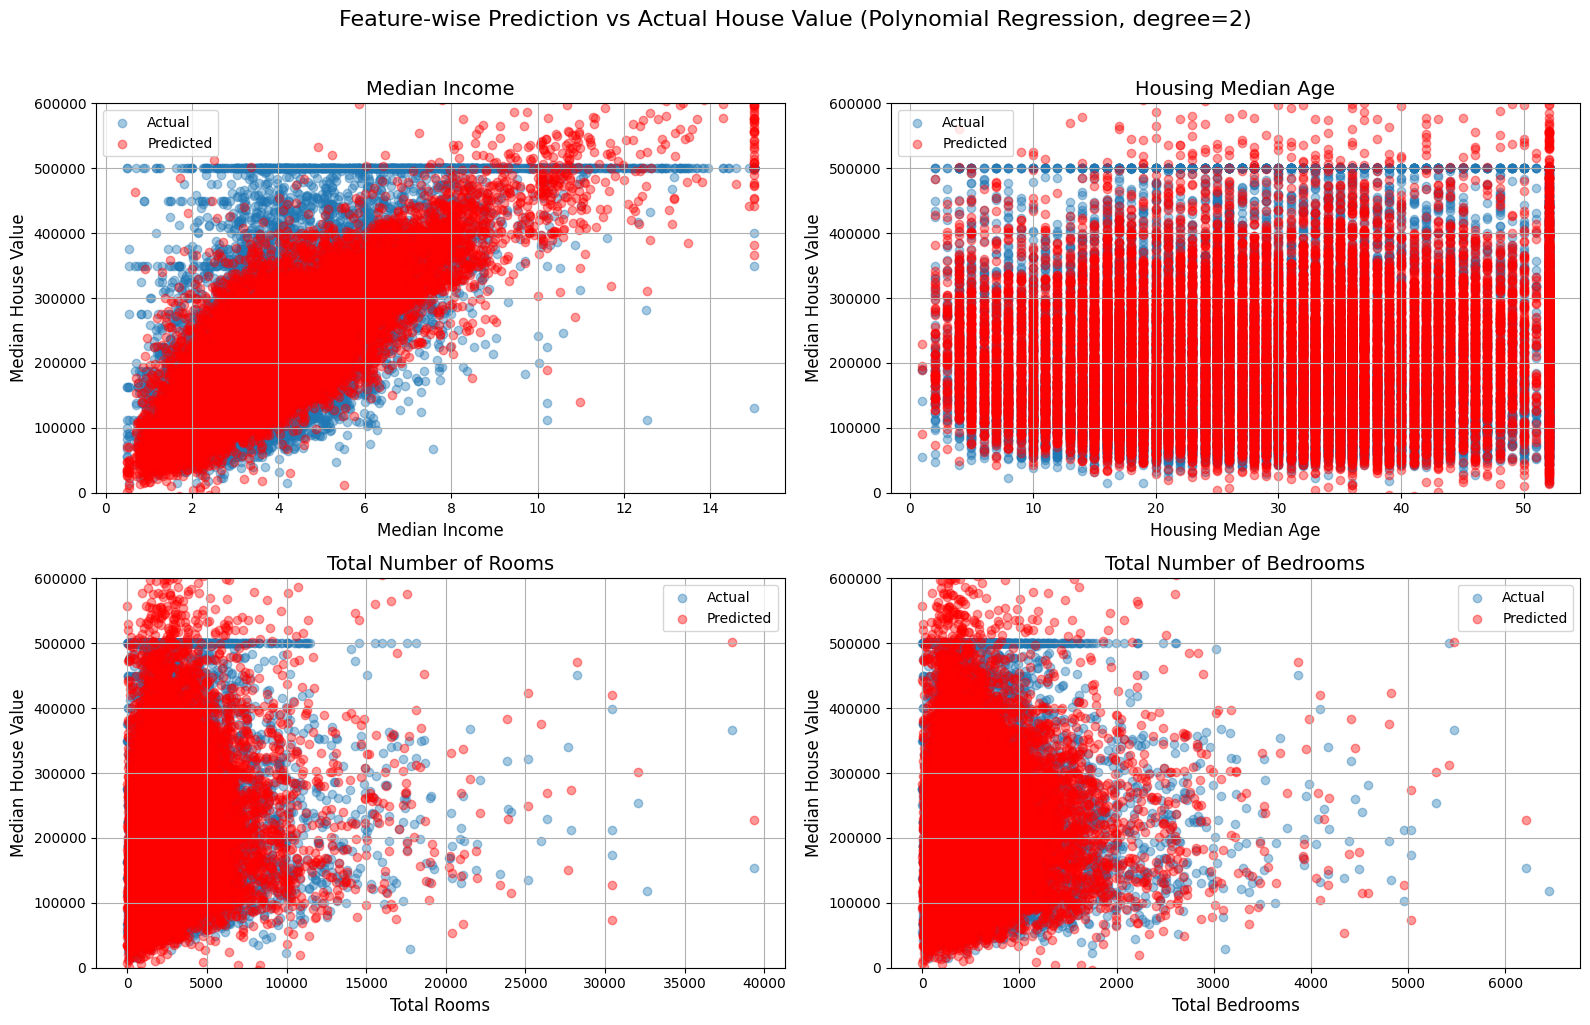

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle("Feature-wise Prediction vs Actual House Value (Polynomial Regression, degree=2)", fontsize=16, y=1.02)

# Common settings
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms']
titles = ['Median Income', 'Housing Median Age', 'Total Number of Rooms', 'Total Number of Bedrooms']
y_max = 600000

for ax, feature, title in zip(axes.flat, features, titles):
    ax.scatter(df[feature], df['median_house_value'], label='Actual', alpha=0.4)
    ax.scatter(df[feature], y_hat, color='red', label='Predicted', alpha=0.4)
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel("Median House Value", fontsize=12)
    ax.set_ylim(0, y_max)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## Saving the model

In [71]:
from joblib import dump, load

In [72]:
dump(final_model, 'final_houseing_model_v2.joblib')

['final_houseing_model_v2.joblib']

## Loading the model

In [73]:
loaded_model = load('final_houseing_model_v2.joblib')

In [74]:
loaded_model.coef_

array([ 6.99181490e+05,  9.85967574e+05, -7.90490228e+04,  9.80450632e+02,
       -3.76975489e+03,  6.65847317e+02, -3.39214172e+03, -9.38210212e+05,
        4.68014385e+03,  1.22581824e+04, -9.54097955e+02,  1.25319964e+01,
       -4.97931740e+01,  9.61853151e+00, -4.42937750e+01, -1.20385583e+04,
        6.99427429e+03, -1.01746683e+03,  1.31195551e+01, -5.46425737e+01,
        1.38340959e+01, -5.47236872e+01, -1.25175729e+04,  2.23505342e+01,
       -1.27483374e-01,  7.03652524e-01, -1.42317888e+00,  5.11373298e+00,
        1.04318598e+02, -1.31275255e-03,  5.34472682e-03, -5.97875729e-03,
        3.21980349e-02,  8.59656633e+00, -5.60814873e-03,  3.21243198e-02,
       -1.65191484e-01, -2.45385561e+01,  3.02903587e-03, -2.14359166e-02,
       -5.73810192e+00,  4.70521579e-02,  9.11235168e-01, -2.24687096e+03])

## Predicting using this model

In [83]:
new = [[
-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252,
14942.5729, 1434.0544, 1681.0, 774400.0, 16641.0, 103684.0, 15876.0, 69.32126004,
-4733.6724, -5011.43, -107562.4, -15767.67, -39300.06, -15400.98, -1017.423096,
1551.68, 33374.4, 4885.32, 12187.36, 4772.88, 315.248576,
36080.0, 5289.0, 13202.0, 5148.0, 341.3332,
113520.0, 283360.0, 110880.0, 7326.176,
41538.0, 16254.0, 1073.4528,
40572.0, 2834.5144,
1000.9752
]]



In [84]:
loaded_model.predict(new)

array([42274217.9424158])